In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0 )


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.svm import SVC 
Classifier = SVC( kernel='rbf' , random_state=0)
Classifier.fit(X_train , y_train)

SVC(random_state=0)

In [6]:
print(Classifier.predict(sc.transform([[30 , 87000]])))

[0]


In [7]:
y_pred = Classifier.predict(X_test)
print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix : \n", cm)


print("Accuracy Score : ", accuracy_score(y_test, y_pred))

confusion Matrix : 
 [[55  3]
 [ 1 21]]
Accuracy Score :  0.95


C:\Users\samar\AppData\Local\Temp\ipykernel_13436\2208312456.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


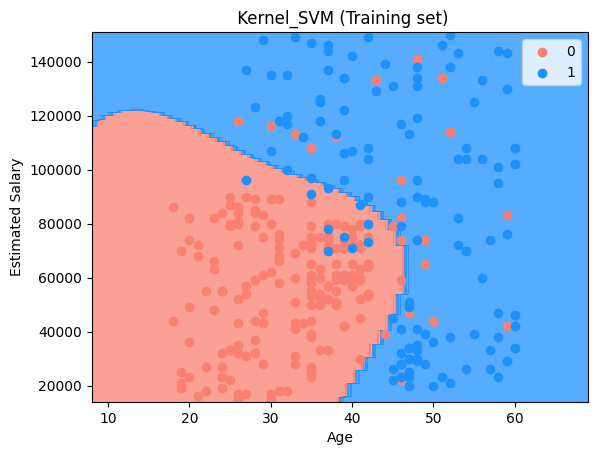

In [9]:
# Visualising the Training Set Result
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=100),
)

Z = Classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
    X1.shape
)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("salmon", "dodgerblue")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("salmon", "dodgerblue"))(i),
        label=j,
    )

plt.title(" Kernel_SVM (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

plt.legend()

plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_13436\1632593087.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


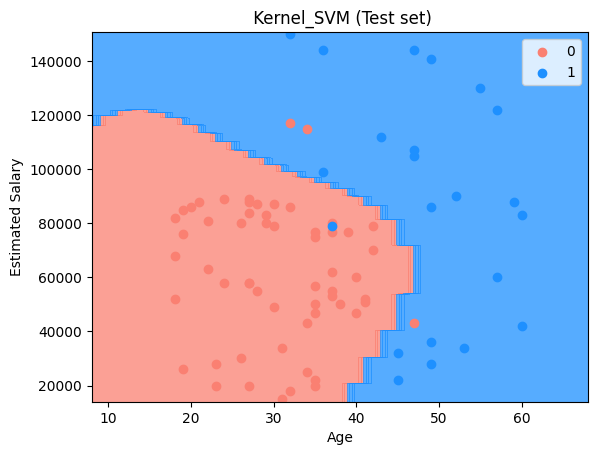

In [11]:
# Visualizing the Test Set Result for SVM classifier
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

X_set, y_set = sc.inverse_transform(X_test), y_test


X1, X2 = np.meshgrid(
    np.arange(
        start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=2
    ),  # Increase step size to 2
    np.arange(
        start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=200
    ),  # Increase step size for Y to 200
)

Z = Classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
    X1.shape
)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("salmon", "dodgerblue")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("salmon", "dodgerblue"))(i),
        label=j,
    )


plt.title(" Kernel_SVM (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()